In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from IPython.display import HTML

import thicket as th
from thicket.model_extrap import Modeling

display(HTML("<style>.container { width:80% !important; }</style>"))

# display all columns from pandas data frames
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)

data = "../../data/LULESH/exclusive/weak"
t_ens = th.Thicket.from_caliperreader(data)


<IPython.core.display.Javascript object>

In [2]:
mdl = Modeling(
    t_ens,
    parameters=[
        "jobsize",
        "problem_size",
    ],
    metrics=[
        #"Avg time/rank",
        "Avg time/rank (exc)",
        #"Total time",
    ],
)

mdl.produce_models(use_median=True)

/usr/WS2/ritter5/thicket/thicket/model_extrap.py:983: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$5.514\times10^{−4}+6.196\times10^{−6}\cdot q^{7/4}$' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  thicket_node, str(metric) + MODEL_TAG


In [3]:
#t_ens.statsframe.dataframe

<Figure size 432x288 with 0 Axes>

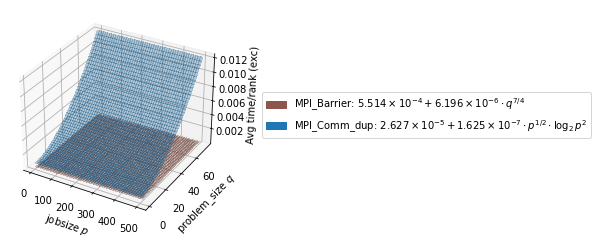

In [4]:
model_objects = t_ens.statsframe.dataframe["Avg time/rank (exc)_extrap-model"].filter(like="MPI_")
    
models = []
max = 2
counter = 0
for model in model_objects:
    if counter < max:
        models.append(model)
    counter += 1

from thicket.model_extrap import multi_display
plt.clf()
fig, ax = multi_display(models)
plt.show()


In [5]:
t_ens.statsframe.dataframe
agg_df = mdl.produce_aggregated_model()
agg_df

,name,Avg time/rank (exc)_extrap-model,Avg time/rank (exc)_RSS_extrap-model,Avg time/rank (exc)_rRSS_extrap-model,Avg time/rank (exc)_SMAPE_extrap-model,Avg time/rank (exc)_AR2_extrap-model,Avg time/rank (exc)_RE_extrap-model
0,aggregated_nodes,$-5.418\times10^{1}-1.622\times10^{−3}\cdot q^{3}\cdot \log_2{q}^{1}+1.256\times10^{−3}\cdot p^{1/4}\cdot q^{3}\cdot \log_2{q}^{1}$,133012.871061,2920.729649,68.733205,0.989916,3.996881


<Figure size 432x288 with 0 Axes>

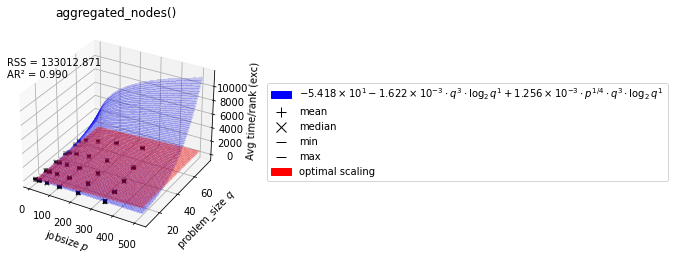

In [6]:
model_obj = agg_df.at[agg_df.index[0], "Avg time/rank (exc)_extrap-model"]

len(agg_df)

plt.clf()
fig, ax = model_obj.display(show_mean=True, show_median=True, 
                            show_min_max=True, RSS=True, 
                            AR2=True, show_opt_scaling=True,
                            opt_scaling_func="1.5*p**1")

plt.show()